## Analysis goal
- CPU와 GPU가 무어의 법칙을 따르는가 - 무어의 법칙을 설명해야함
- 세계 CPU and GPU성능에 따른 대한민국 반도체 및 디스플레이 동향파악
- 대한민국 반도체, 디스플레이 시장이 CPU와 GPU의 연관성
- 반도체 시장은 CPU, GPU의 연관성
- 디스플레이 시장은 CPU, GPU의 연관성
- (CPU는 반도체 시장과 연관이 있고, GPU는 디스플레이 시장과 연관이 있을꺼라는 추측)

- 스마트폰 가격 예측?
- 무어의 법칙 선

- DRAM과 상관도(x)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [21]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [22]:
with open('mydataframe.pickle', 'rb') as f:
    df = pickle.load(f)
    
chip_data = df[0].reset_index()
chip_data

,년도,Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
0,2004,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923
1,2005,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684
2,2006,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868
3,2007,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759
4,2008,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751
5,2009,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906
6,2010,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497
7,2011,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725
8,2012,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243
9,2013,25.007143,28.971292,1577.800000,2150.435407,2377.207143,744.693780


# CPU와 GPU(발전)가 무어의 법칙을 따르는가 

***무어의 법칙 설명***

***무어의 법칙을 따르는 선 하나 긋기***

***CPU와 GPU의 발전 속도를 분석***

In [23]:
first = int(104.213235)
list1 = [first]

for i in range(1, 16):
    filter1 = i%2
    if filter1 == 1:
        list1.append('NaN')
    else:
        first *= 2
        second = first
        list1.append(second)

first = int(332.938462)
list2 = [first]        
for e in range(1, 16):
    filter2 = e%2
    if filter2 == 1:
        list2.append('NaN')
    else:
        first *= 2
        second = first
        list2.append(second)
        
        
df_list = pd.DataFrame(list1)
df_list2 = pd.DataFrame(list2)
chip_data['Moores_raw_CPU'] = df_list
chip_data['Moores_raw_GPU'] = df_list2

In [24]:
chip_data

,년도,Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU,Moores_raw_CPU,Moores_raw_GPU
0,2004,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923,104,332
1,2005,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684,NaN,NaN
2,2006,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868,208,664
3,2007,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759,NaN,NaN
4,2008,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751,416,1328
5,2009,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906,NaN,NaN
6,2010,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497,832,2656
7,2011,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725,NaN,NaN
8,2012,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243,1664,5312
9,2013,25.007143,28.971292,1577.800000,2150.435407,2377.207143,744.693780,NaN,NaN


/tmp/ipykernel_3044/3877319124.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(chip_data['년도'], rotation = 45)
/tmp/ipykernel_3044/3877319124.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(chip_data['년도'], rotation = 45)
/tmp/ipykernel_3044/3877319124.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(chip_data['년도'], rotation = 45)


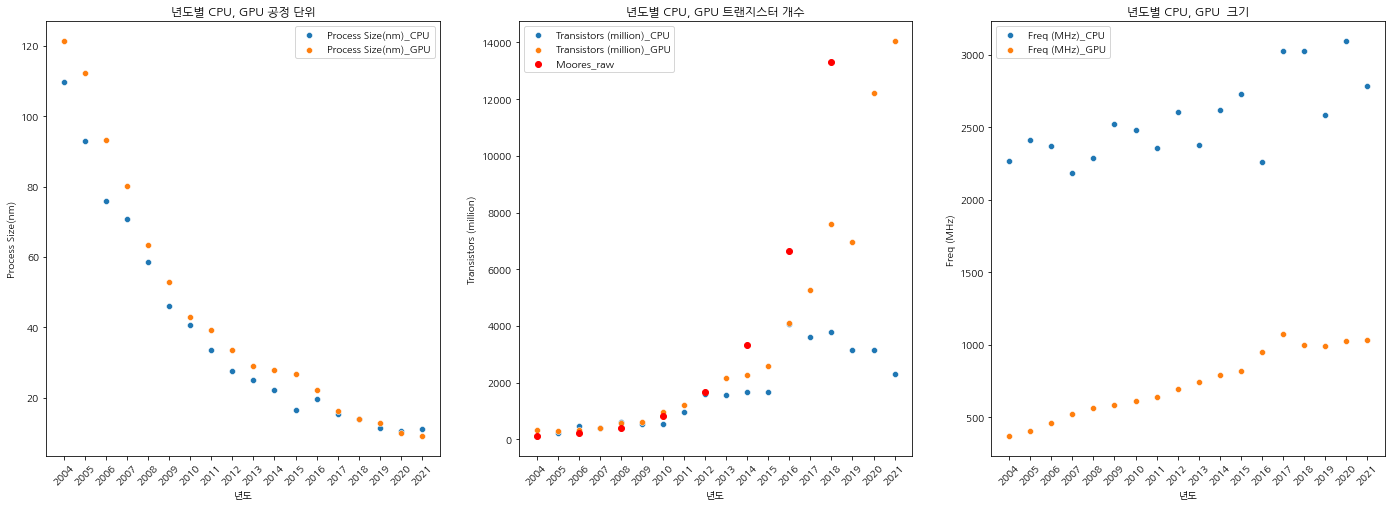

In [25]:
# 데이터 년도별 분석

fig, axes = plt.subplots(1,3, figsize = (24,8))

m = sns.scatterplot(data = chip_data, x = '년도', y = 'Process Size(nm)_CPU', ax = axes[0])
sns.scatterplot(data = chip_data, x = '년도', y = 'Process Size(nm)_GPU', ax = axes[0])

axe = m.axes
axe.set_xticklabels(chip_data['년도'], rotation = 45)
axe.set_title('년도별 CPU, GPU 공정 단위')
axe.set_ylabel('Process Size(nm)')

axes[0].legend(labels=["Process Size(nm)_CPU","Process Size(nm)_GPU"])
# CPU와 GPU모두 공정 단위는 급수적으로 감소하고 있다.

# axes[1]
g = sns.scatterplot(data = chip_data, x = '년도', y = 'Transistors (million)_CPU', ax = axes[1])
sns.scatterplot(data = chip_data, x = '년도', y = 'Transistors (million)_GPU', ax = axes[1])

axe = g.axes
axe.set_xticklabels(chip_data['년도'], rotation = 45)
axe.set_title('년도별 CPU, GPU 트랜지스터 개수')
axe.set_ylabel('Transistors (million)')



# 2018년도부터 GPU의 연산속도를 높이기 위해 급격하게 Transistor의 갯수를 많이 넣고있다. ==> 이유 : AI가 주목받기 시작한 시점부터
# CPU도 2018년도까지 무어의 법칙을 따르다가  2018년도부터는 반대로 트랜지스터의 개수가 줄어들고 있다. ==> 이유 : 기술적 한계
# CPU는 기술이 성숙기에 접어들었다고 생각

# axes[2]

a = sns.scatterplot(data = chip_data, x = '년도', y = 'Freq (MHz)_CPU', ax = axes[2])
sns.scatterplot(data = chip_data, x = '년도', y = 'Freq (MHz)_GPU', ax = axes[2])

axe = a.axes
axe.set_xticklabels(chip_data['년도'], rotation = 45)
axe.set_title('년도별 CPU, GPU  크기')
axe.set_ylabel('Freq (MHz)')

axes[2].legend(labels=["Freq (MHz)_CPU","Freq (MHz)_GPU"])

# CPU는 GPU보다 비교적 high 주파수를 활용하고 있고, GPU의 주파수도 점점 catch up하는 중이다.


# 무어의 법칙 넣기
#sns.scatterplot(data = chip_data, x = '년도', y = 'Moores_raw_CPU', c = 'r', ax = axes[1])
axes[1].scatter(chip_data['년도'], chip_data['Moores_raw_CPU'], c = 'r', label = 'Moores_raw_CPU')
axes [1].plot(chip_data['년도'], chip_data['Moores_raw_CPU'], c = 'r')
axes[1].legend(labels=["Transistors (million)_CPU","Transistors (million)_GPU", 'Moores_raw'])

In [26]:
# EDA에서 본 결과들 정밀 분석

#GPU 상관도 측정

corr_GPU_tran = np.corrcoef(chip_data['Transistors (million)_GPU'], chip_data['Freq (MHz)_GPU'])[0,1]
print('GPU의 트랜지스터와 주파수 상관도 : ', corr_GPU_tran)

corr_GPU_proc = np.corrcoef(chip_data['Process Size(nm)_GPU'], chip_data['Transistors (million)_GPU'])[0,1]
print('GPU의 단위 공정과 트랜지스터 상관도 : ', corr_GPU_proc)

corr_GPU_freq = np.corrcoef(chip_data['Process Size(nm)_GPU'], chip_data['Freq (MHz)_GPU'])[0,1]
print('GPU의 단위 공정과 주파수 상관도 : ', corr_GPU_proc)

##########################################################################################
#CPU 상관도 측정

corr_CPU_tran = np.corrcoef(chip_data['Transistors (million)_CPU'], chip_data['Freq (MHz)_CPU'])[0,1]
print('CPU의 트랜지스터와 주파수 상관도 : ', corr_CPU_tran)

corr_CPU_proc = np.corrcoef(chip_data['Process Size(nm)_CPU'], chip_data['Transistors (million)_CPU'])[0,1]
print('CPU의 단위 공정과 트랜지스터 상관도 : ', corr_CPU_proc)

corr_CPU_freq = np.corrcoef(chip_data['Process Size(nm)_CPU'], chip_data['Freq (MHz)_CPU'])[0,1]
print('CPU의 단위 공정과 주파수 상관도 : ', corr_CPU_freq)

# 0.7이상인 것 == GPU의 트랜지스터와 주파수 상관도, CPU의 단위 공정과 트랜지스터 상관도

GPU의 트랜지스터와 주파수 상관도 :  0.8172249748388621
GPU의 단위 공정과 트랜지스터 상관도 :  -0.6728495023009691
GPU의 단위 공정과 주파수 상관도 :  -0.6728495023009691
CPU의 트랜지스터와 주파수 상관도 :  0.6416900063411868
CPU의 단위 공정과 트랜지스터 상관도 :  -0.783210619089342
CPU의 단위 공정과 주파수 상관도 :  -0.6482582509198672


Text(0.5, 1.0, 'GPU Transistor와 Process Size 관계')

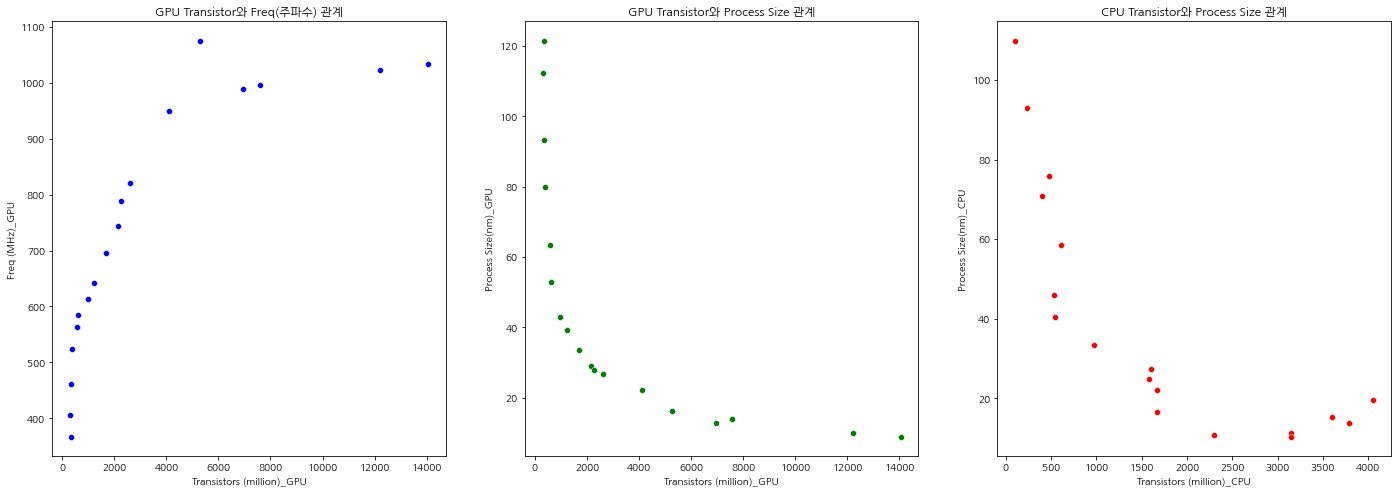

In [27]:
fig, axes = plt.subplots(1,3, figsize = (24,8))

sns.scatterplot(data = chip_data, x = 'Transistors (million)_GPU', y = 'Freq (MHz)_GPU', c ='b', ax = axes[0])
axes[0].set_title('GPU Transistor와 Freq(주파수) 관계')

sns.scatterplot(data = chip_data, x = 'Transistors (million)_CPU', y = 'Process Size(nm)_CPU', c = 'r', ax = axes[2])
axes[2].set_title('CPU Transistor와 Process Size 관계')

sns.scatterplot(data = chip_data, x = 'Transistors (million)_GPU', y = 'Process Size(nm)_GPU', c = 'g', ax = axes[1])
axes[1].set_title('GPU Transistor와 Process Size 관계')


# GPU는 Transistor 갯수가 증가할수록 그에 맞춰 Freq(주파수)도 증가한다.
# 또한, GPU는 단위공정이 줄어들수록 CPU와 반대로 훨씬 많은량의 Transistor를 넣고있다.
#                                      ==> 성능향상에 목표를 두고 기하급수적으로 성능향상하고있다.

# CPU는 공정의 단위가 줄어들수록 그에 들어가는 Transistor의 갯수도 증가한다. ==> 기술력 향상
# but, 최근들어 CPU의 공정단위는 기하급수적으로 줄어들고 있지만, Transsitor 갯수는 그에 맞춰 증가하지 못한다 ==> 기술력의 한계에 다 다랐다.

# CPU보다는 GPU의 발전에 조금 더 초점을 맞춰야한다.

# CPU와 GPU(발전)가 무어의 법칙을 따르는가 - 끝 

# 반도체 및 디스플레이 생산 그리고 시장 점유율 분석

In [28]:
kr_data = df[1]
kr_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(억불),반도체_수출증가율(퍼센트),반도체_수입(억불),반도체_수입증가율(퍼센트),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(억불),디스플레이_수출증가율(퍼센트),디스플레이_수입(억불),디스플레이_수입증가율(퍼센트),LCD_평균가격(달러),Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,,,,,
2004,34.6,9.6,265.2,35.7,236.2,10.7,1.72,33.0,38.7,14,75.0,10,42.9,28.9,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923
2005,32.4,10.5,299.8,13.1,251.3,6.4,2.16,36.0,40.7,49,250.0,10,0.0,28.0,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684
2006,32.4,11.3,373.6,24.6,280.4,11.6,1.59,40.6,40.6,125,155.1,12,20.0,25.8,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868
2007,37.5,11.4,390.4,4.5,308.2,9.9,2.17,43.6,40.4,171,36.8,30,150.0,23.8,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759
2008,36.4,9.8,327.9,-16.0,320.2,3.9,0.93,51.9,39.5,188,9.9,39,30.0,30.1,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751
2009,40.8,11.7,310.4,-5.3,266.2,-16.9,0.66,72.6,45.3,256,36.2,42,7.7,28.6,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906
2010,51.2,14.3,507.1,63.4,311.4,17.0,1.20,90.0,45.7,332,29.7,52,23.8,31.9,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497
2011,61.5,13.8,501.4,-1.1,324.8,4.3,0.60,86.7,47.6,333,0.3,51,-1.9,30.1,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725
2012,64.5,14.3,504.3,0.6,322.4,-0.8,1.60,82.3,50.7,368,10.5,45,-11.8,34.7,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243


In [29]:
kr_data = kr_data.drop(['반도체_수출증가율(퍼센트)', '반도체_수입증가율(퍼센트)', '디스플레이_수출증가율(퍼센트)', '디스플레이_수입증가율(퍼센트)']
                      ,axis = 1)
kr_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(억불),반도체_수입(억불),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(억불),디스플레이_수입(억불),LCD_평균가격(달러),Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,
2004,34.6,9.6,265.2,236.2,1.72,33.0,38.7,14,10,28.9,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923
2005,32.4,10.5,299.8,251.3,2.16,36.0,40.7,49,10,28.0,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684
2006,32.4,11.3,373.6,280.4,1.59,40.6,40.6,125,12,25.8,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868
2007,37.5,11.4,390.4,308.2,2.17,43.6,40.4,171,30,23.8,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759
2008,36.4,9.8,327.9,320.2,0.93,51.9,39.5,188,39,30.1,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751
2009,40.8,11.7,310.4,266.2,0.66,72.6,45.3,256,42,28.6,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906
2010,51.2,14.3,507.1,311.4,1.20,90.0,45.7,332,52,31.9,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497
2011,61.5,13.8,501.4,324.8,0.60,86.7,47.6,333,51,30.1,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725
2012,64.5,14.3,504.3,322.4,1.60,82.3,50.7,368,45,34.7,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243


In [30]:
# 억불 ==> 조원으로 단위 맞춤

kr_data['반도체_수출(조원)'] = kr_data['반도체_수출(억불)'] * 1344 / 10000
kr_data['반도체_수입(조원)'] = kr_data['반도체_수입(억불)'] * 1344 / 10000
kr_data['디스플레이_수출(조원)'] = kr_data['디스플레이_수출(억불)'] * 1344 / 10000
kr_data['디스플레이_수입(조원)'] = kr_data['디스플레이_수입(억불)'] * 1344 / 10000

In [31]:
kr_data.drop(['반도체_수출(억불)', '반도체_수입(억불)', '디스플레이_수출(억불)', '디스플레이_수입(억불)'],
                       axis = 1, inplace = True)

In [32]:
# 컬럼 순서 변경
kr_data = kr_data[['반도체_생산(조원)', '반도체_시장점유율(퍼센트)','반도체_수출(조원)', '반도체_수입(조원)', 
                  'DRAM_가격(달러)', '디스플레이_생산(조원)', '디스플레이_시장점유율(퍼센트)','디스플레이_수출(조원)', 
                  '디스플레이_수입(조원)','LCD_평균가격(달러)', 'Process Size(nm)_CPU', 
                  'Transistors (million)_CPU', 'Freq (MHz)_CPU', 
                  'Process Size(nm)_GPU', 'Transistors (million)_GPU', 'Freq (MHz)_GPU']]
kr_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,
2004,34.6,9.6,35.64288,31.74528,1.72,33.0,38.7,1.8816,1.3440,28.9,109.705882,104.213235,2267.705882,121.384615,332.938462,367.376923
2005,32.4,10.5,40.29312,33.77472,2.16,36.0,40.7,6.5856,1.3440,28.0,92.954545,230.584416,2409.831169,112.315789,294.684211,405.273684
2006,32.4,11.3,50.21184,37.68576,1.59,40.6,40.6,16.8000,1.6128,25.8,75.925926,478.266667,2370.696296,93.178295,348.031008,460.472868
2007,37.5,11.4,52.46976,41.42208,2.17,43.6,40.4,22.9824,4.0320,23.8,70.869565,398.014493,2180.652174,80.031646,388.797468,524.360759
2008,36.4,9.8,44.06976,43.03488,0.93,51.9,39.5,25.2672,5.2416,30.1,58.571429,606.089286,2287.241071,63.439306,566.826590,564.190751
2009,40.8,11.7,41.71776,35.77728,0.66,72.6,45.3,34.4064,5.6448,28.6,45.913043,533.860870,2519.904348,52.783019,613.830189,584.584906
2010,51.2,14.3,68.15424,41.85216,1.20,90.0,45.7,44.6208,6.9888,31.9,40.576389,539.958333,2477.243056,42.870748,972.979592,613.741497
2011,61.5,13.8,67.38816,43.65312,0.60,86.7,47.6,44.7552,6.8544,30.1,33.465409,976.616352,2355.496855,39.280702,1228.198830,641.356725
2012,64.5,14.3,67.77792,43.33056,1.60,82.3,50.7,49.4592,6.0480,34.7,27.455696,1602.253165,2604.468354,33.653179,1685.982659,696.046243


In [33]:
ko_data = kr_data.reset_index()

ko_data['반도체 수출/생산(퍼센트)'] = ko_data['반도체_수출(조원)']/ko_data['반도체_생산(조원)'] * 100
ko_data['디스플레이 수출/생산(퍼센트)'] = ko_data['디스플레이_수출(조원)']/ko_data['디스플레이_생산(조원)'] * 100

/tmp/ipykernel_3044/3056855490.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(ko_data['년도'], rotation = 45)
/tmp/ipykernel_3044/3056855490.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(ko_data['년도'], rotation = 45)


<Axes: title={'center': '년도별 반도체 디스플레이 시장점유율 비교'}, xlabel='년도', ylabel='반도체_시장점유율(퍼센트)'>

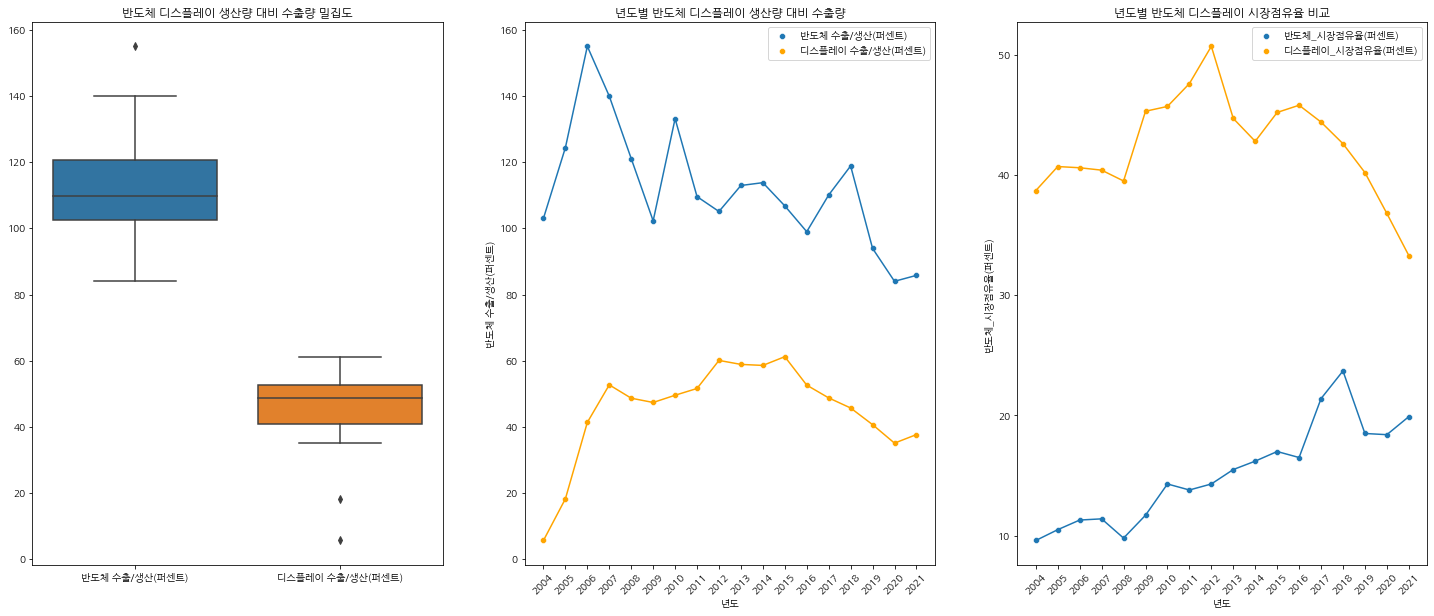

In [34]:
# 반도체, 디스플레이 생산량 대비 수출량(퍼센트) ==  수출 / 생산 (반도체, 디스플레이 GDP지수)

fig, axes = plt.subplots(1,3, figsize = (25,10))

sns.boxplot(data = ko_data[['반도체 수출/생산(퍼센트)', '디스플레이 수출/생산(퍼센트)']], ax = axes[0])
sns.scatterplot(data = ko_data, x = '년도', y = '반도체 수출/생산(퍼센트)', ax = axes[1])
sns.scatterplot(data = ko_data, x = '년도', y = '디스플레이 수출/생산(퍼센트)', c = 'orange', ax = axes[1])
sns.scatterplot(data = ko_data, x = '년도', y = '반도체_시장점유율(퍼센트)', ax = axes[2])
sns.scatterplot(data = ko_data, x = '년도', y = '디스플레이_시장점유율(퍼센트)', c = 'orange', ax = axes[2])

axes[0].set_title('반도체 디스플레이 생산량 대비 수출량 밀집도')
axes[1].set_title('년도별 반도체 디스플레이 생산량 대비 수출량')
axes[1].set_xticklabels(ko_data['년도'], rotation = 45)
axes[2].set_title('년도별 반도체 디스플레이 시장점유율 비교')
axes[2].set_xticklabels(ko_data['년도'], rotation = 45)

axes[1].legend(labels=["반도체 수출/생산(퍼센트)","디스플레이 수출/생산(퍼센트)"])
axes[2].legend(labels=["반도체_시장점유율(퍼센트)","디스플레이_시장점유율(퍼센트)"])

sns.lineplot(data = ko_data, x = '년도', y = '반도체 수출/생산(퍼센트)', ax = axes[1])
sns.lineplot(data = ko_data, x = '년도', y = '디스플레이 수출/생산(퍼센트)', c = 'orange', ax = axes[1])

sns.lineplot(data = ko_data, x = '년도', y = '반도체_시장점유율(퍼센트)', ax = axes[2])
sns.lineplot(data = ko_data, x = '년도', y = '디스플레이_시장점유율(퍼센트)', c = 'orange', ax = axes[2])



# 시장 점유율은 반도체가 디스플레이보다 훨씬 낮다. 하지만 생산에 들어가는 금액은 반도체가 훨씬 높다.
# 반도체는 쓰임새가 많아 많이 생산, 디스플레이는 쓰임새가 한정적이여서 적당히 생산 ==> 시장점유율은 높은편
# 그러나 시장 점유율 역시 반도체는 늘어나는 추세이고, 디스플레이는 줄어드는 추세이다.

# 반도체 및 디스플레이 생산 그리고 시장 점유율 분석 - 끝

# 반도체 디스플레이 와 CPU및 GPU의 상관도 분석

In [35]:
kr_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,
2004,34.6,9.6,35.64288,31.74528,1.72,33.0,38.7,1.8816,1.3440,28.9,109.705882,104.213235,2267.705882,121.384615,332.938462,367.376923
2005,32.4,10.5,40.29312,33.77472,2.16,36.0,40.7,6.5856,1.3440,28.0,92.954545,230.584416,2409.831169,112.315789,294.684211,405.273684
2006,32.4,11.3,50.21184,37.68576,1.59,40.6,40.6,16.8000,1.6128,25.8,75.925926,478.266667,2370.696296,93.178295,348.031008,460.472868
2007,37.5,11.4,52.46976,41.42208,2.17,43.6,40.4,22.9824,4.0320,23.8,70.869565,398.014493,2180.652174,80.031646,388.797468,524.360759
2008,36.4,9.8,44.06976,43.03488,0.93,51.9,39.5,25.2672,5.2416,30.1,58.571429,606.089286,2287.241071,63.439306,566.826590,564.190751
2009,40.8,11.7,41.71776,35.77728,0.66,72.6,45.3,34.4064,5.6448,28.6,45.913043,533.860870,2519.904348,52.783019,613.830189,584.584906
2010,51.2,14.3,68.15424,41.85216,1.20,90.0,45.7,44.6208,6.9888,31.9,40.576389,539.958333,2477.243056,42.870748,972.979592,613.741497
2011,61.5,13.8,67.38816,43.65312,0.60,86.7,47.6,44.7552,6.8544,30.1,33.465409,976.616352,2355.496855,39.280702,1228.198830,641.356725
2012,64.5,14.3,67.77792,43.33056,1.60,82.3,50.7,49.4592,6.0480,34.7,27.455696,1602.253165,2604.468354,33.653179,1685.982659,696.046243


In [36]:
def check_semi_corr(df):
    list3 = []
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['반도체_생산(조원)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) 반도체 생산의 상관도 : ", corr)
        list3.append(corr)
    return list3

def check_display_corr(df):
    list4 = []
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['디스플레이_생산(조원)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) 디스플레이 생산의 상관도 : ", corr)
        list4.append(corr)
    return list4

def check_dram_corr(df):
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['DRAM_가격(달러)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) DRAM 가격의 상관도 : ", corr)

In [37]:
# 반도체 생산 가격에 따른 CPU와 GPU 공정단위, 트랜지스터 갯수, 주파수 상관도 구하기
semi_co = check_semi_corr(kr_data)

# 반도체 생산과 가장 연관성이 높은 것은 GPU의 주파수이다.


반도체_생산(조원) 와(과) 반도체 생산의 상관도 :  1.0

반도체_시장점유율(퍼센트) 와(과) 반도체 생산의 상관도 :  0.8668312566982483

반도체_수출(조원) 와(과) 반도체 생산의 상관도 :  0.9656570746538266

반도체_수입(조원) 와(과) 반도체 생산의 상관도 :  0.9737013786266472

DRAM_가격(달러) 와(과) 반도체 생산의 상관도 :  0.4029550836155996

디스플레이_생산(조원) 와(과) 반도체 생산의 상관도 :  0.4176586576156323

디스플레이_시장점유율(퍼센트) 와(과) 반도체 생산의 상관도 :  -0.4143790100072571

디스플레이_수출(조원) 와(과) 반도체 생산의 상관도 :  0.15487545178076698

디스플레이_수입(조원) 와(과) 반도체 생산의 상관도 :  0.29956428267824553

LCD_평균가격(달러) 와(과) 반도체 생산의 상관도 :  0.5189353054453992

Process Size(nm)_CPU 와(과) 반도체 생산의 상관도 :  -0.7407913978239382

Transistors (million)_CPU 와(과) 반도체 생산의 상관도 :  0.7743601653687915

Freq (MHz)_CPU 와(과) 반도체 생산의 상관도 :  0.7653828427550862

Process Size(nm)_GPU 와(과) 반도체 생산의 상관도 :  -0.7626333324091022

Transistors (million)_GPU 와(과) 반도체 생산의 상관도 :  0.9755629331810242

Freq (MHz)_GPU 와(과) 반도체 생산의 상관도 :  0.8917282400232124


In [38]:
# 디스플레이 생산 가격에 따른 CPU와 GPU 공정단위, 트랜지스터 갯수, 주파수 상관도 구하기
dis_co = check_display_corr(kr_data)

# 디스플레이와 가장 상관성이 높은 부분은 GPU의 공정 단위이다.


반도체_생산(조원) 와(과) 디스플레이 생산의 상관도 :  0.4176586576156323

반도체_시장점유율(퍼센트) 와(과) 디스플레이 생산의 상관도 :  0.5589738081255275

반도체_수출(조원) 와(과) 디스플레이 생산의 상관도 :  0.44747046153751285

반도체_수입(조원) 와(과) 디스플레이 생산의 상관도 :  0.41787406837329377

DRAM_가격(달러) 와(과) 디스플레이 생산의 상관도 :  0.09792476539948694

디스플레이_생산(조원) 와(과) 디스플레이 생산의 상관도 :  1.0

디스플레이_시장점유율(퍼센트) 와(과) 디스플레이 생산의 상관도 :  0.4703649749900278

디스플레이_수출(조원) 와(과) 디스플레이 생산의 상관도 :  0.9018860183423091

디스플레이_수입(조원) 와(과) 디스플레이 생산의 상관도 :  0.8484589440866094

LCD_평균가격(달러) 와(과) 디스플레이 생산의 상관도 :  0.6462809525017266

Process Size(nm)_CPU 와(과) 디스플레이 생산의 상관도 :  -0.7942795736208741

Transistors (million)_CPU 와(과) 디스플레이 생산의 상관도 :  0.3971844606771887

Freq (MHz)_CPU 와(과) 디스플레이 생산의 상관도 :  0.418407592297719

Process Size(nm)_GPU 와(과) 디스플레이 생산의 상관도 :  -0.802853537429643

Transistors (million)_GPU 와(과) 디스플레이 생산의 상관도 :  0.312535667708979

Freq (MHz)_GPU 와(과) 디스플레이 생산의 상관도 :  0.5650523613833859


In [39]:
# DRAM
check_dram_corr(kr_data)


반도체_생산(조원) 와(과) DRAM 가격의 상관도 :  0.4029550836155997

반도체_시장점유율(퍼센트) 와(과) DRAM 가격의 상관도 :  0.5739236527792215

반도체_수출(조원) 와(과) DRAM 가격의 상관도 :  0.5043191878316114

반도체_수입(조원) 와(과) DRAM 가격의 상관도 :  0.3941291536253952

DRAM_가격(달러) 와(과) DRAM 가격의 상관도 :  0.9999999999999999

디스플레이_생산(조원) 와(과) DRAM 가격의 상관도 :  0.09792476539948694

디스플레이_시장점유율(퍼센트) 와(과) DRAM 가격의 상관도 :  -0.15080522754487455

디스플레이_수출(조원) 와(과) DRAM 가격의 상관도 :  0.16638254927839857

디스플레이_수입(조원) 와(과) DRAM 가격의 상관도 :  0.061122501872414636

LCD_평균가격(달러) 와(과) DRAM 가격의 상관도 :  0.3183945157736903

Process Size(nm)_CPU 와(과) DRAM 가격의 상관도 :  -0.34258237620103854

Transistors (million)_CPU 와(과) DRAM 가격의 상관도 :  0.4205419270907882

Freq (MHz)_CPU 와(과) DRAM 가격의 상관도 :  0.4059077847660048

Process Size(nm)_GPU 와(과) DRAM 가격의 상관도 :  -0.3267407877367149

Transistors (million)_GPU 와(과) DRAM 가격의 상관도 :  0.3140156924941308

Freq (MHz)_GPU 와(과) DRAM 가격의 상관도 :  0.4527020450555788


In [40]:
semi_corr = pd.DataFrame(semi_co)
semi_corr

dis_corr = pd.DataFrame(dis_co)
dis_corr

list5 = ['반도체_생산(조원)', '반도체_시장점유율(퍼센트)', '반도체_수출(조원)', '반도체_수입(조원)', 'DRAM_가격(달러)', '디스플레이_생산(조원)', '디스플레이_시장점유율(퍼센트)', '디스플레이_수출(조원)', '디스플레이_수입(조원)', 'LCD_평균가격(달러)', 'Process Size(nm)_CPU', 'Transistors (million)_CPU', 'Freq (MHz)_CPU', 'Process Size(nm)_GPU', 'Transistors (million)_GPU', 'Freq (MHz)_GPU']
df_list5 = pd.DataFrame(list5)         
         
pd_corr = pd.concat((semi_corr, dis_corr, df_list5), axis = 1)
pd_corr.columns = ['반도체 생산과 상관성', '디스플레이 생산과 상관성', 'index']

In [41]:
pd_corr = pd_corr.drop([0, 4, 5], axis = 0)
pd_corr

,반도체 생산과 상관성,디스플레이 생산과 상관성,index
1,0.866831,0.558974,반도체_시장점유율(퍼센트)
2,0.965657,0.447470,반도체_수출(조원)
3,0.973701,0.417874,반도체_수입(조원)
6,-0.414379,0.470365,디스플레이_시장점유율(퍼센트)
7,0.154875,0.901886,디스플레이_수출(조원)
8,0.299564,0.848459,디스플레이_수입(조원)
9,0.518935,0.646281,LCD_평균가격(달러)
10,-0.740791,-0.794280,Process Size(nm)_CPU
11,0.774360,0.397184,Transistors (million)_CPU
12,0.765383,0.418408,Freq (MHz)_CPU


In [42]:
pd_corr = pd_corr.set_index('index')
pd_corr['반도체 생산과 상관성'] = abs(pd_corr['반도체 생산과 상관성'])
pd_corr['디스플레이 생산과 상관성'] = abs(pd_corr['디스플레이 생산과 상관성'])
pd_corr

,반도체 생산과 상관성,디스플레이 생산과 상관성
index,,
반도체_시장점유율(퍼센트),0.866831,0.558974
반도체_수출(조원),0.965657,0.447470
반도체_수입(조원),0.973701,0.417874
디스플레이_시장점유율(퍼센트),0.414379,0.470365
디스플레이_수출(조원),0.154875,0.901886
디스플레이_수입(조원),0.299564,0.848459
LCD_평균가격(달러),0.518935,0.646281
Process Size(nm)_CPU,0.740791,0.794280
Transistors (million)_CPU,0.774360,0.397184


Text(0.5, 1.0, '디스플레이 생산과 CPU,GPU 상관도')

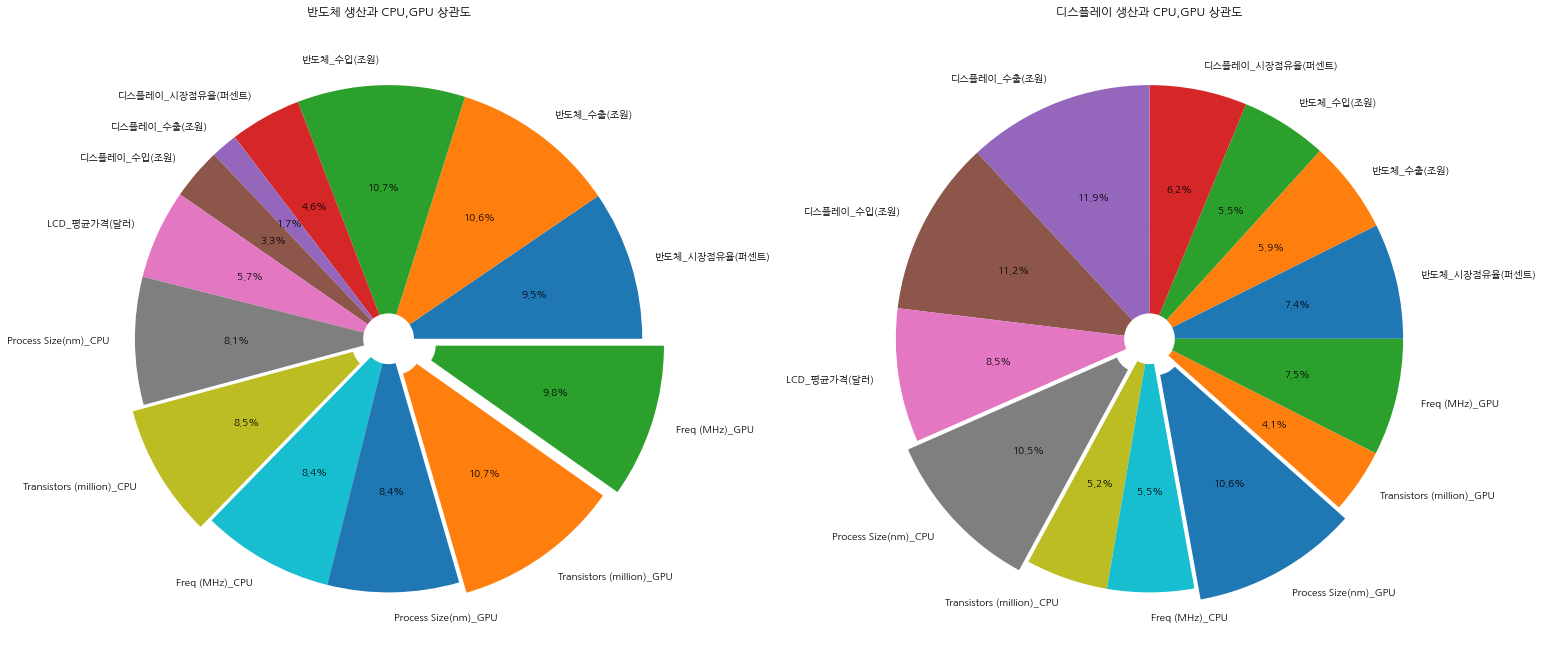

In [43]:
xs = pd_corr['반도체 생산과 상관성']
ys = pd_corr['디스플레이 생산과 상관성']

fig, axe = plt.subplots(1,2, figsize = (25, 12))



#explode를 위한 list
ex_array = np.zeros(len(xs.index))
ex_array[-5] = 0.05
ex_array[-2] = 0.05
ex_array[-1] = 0.09

e_array = np.zeros(len(ys.index))
e_array[-6] = 0.05
e_array[-3] = 0.05


# pie차트
axe[0].pie(xs, labels = xs.index, 
           autopct='%1.1f%%',
           explode = ex_array,
           wedgeprops = dict(width=0.9)
          )
axe[1].pie(ys, labels = ys.index, 
           autopct='%1.1f%%',
           explode = e_array,
           wedgeprops = dict(width=0.9)
          )
axe[0].set_title('반도체 생산과 CPU,GPU 상관도')
axe[1].set_title('디스플레이 생산과 CPU,GPU 상관도')

# 디스플레이 생산은 CPU, GPU의 공정단위와 가장 큰 상관도를 보이고
# 반도체 생산은 CPU와 GPU모두 상관도를 보이나, GPU에 조금 더 큰 상관도를 보인다.

# 반도체 디스플레이 와 CPU및 GPU의 상관도 분석 - 끝

# 반도체에 따른 스마트폰 가격 분석

***회사 별 스마트폰 및 배터리 용량 분석***

In [44]:
df10 = df[2].reset_index()

filter1 = df10['company'] == 'Apple'
filter2 = df10['company'] == 'Samsung'

#df10 = df10.set_index('년도')

df11 = df10[filter1]
df11 = df11.set_index('년도')
df12 = df10[filter2]
df12 = df12.set_index('년도')

df13 = pd.concat((df12, df11), axis = 0)
df13 = df13.reset_index()
df13

,년도,company,Battery Capacity(mAh),Price($)
0,2019,Samsung,4333.333333,425.666667
1,2020,Samsung,5030.769231,544.807692
2,2021,Samsung,4982.222222,438.777778
3,2022,Samsung,4250.000000,646.500000
4,2017,Apple,2691.000000,699.000000
5,2018,Apple,2988.400000,639.000000
6,2019,Apple,3478.142857,849.000000
7,2020,Apple,2141.600000,614.000000
8,2021,Apple,3028.166667,849.000000


<Axes: xlabel='년도', ylabel='Battery Capacity(mAh)'>

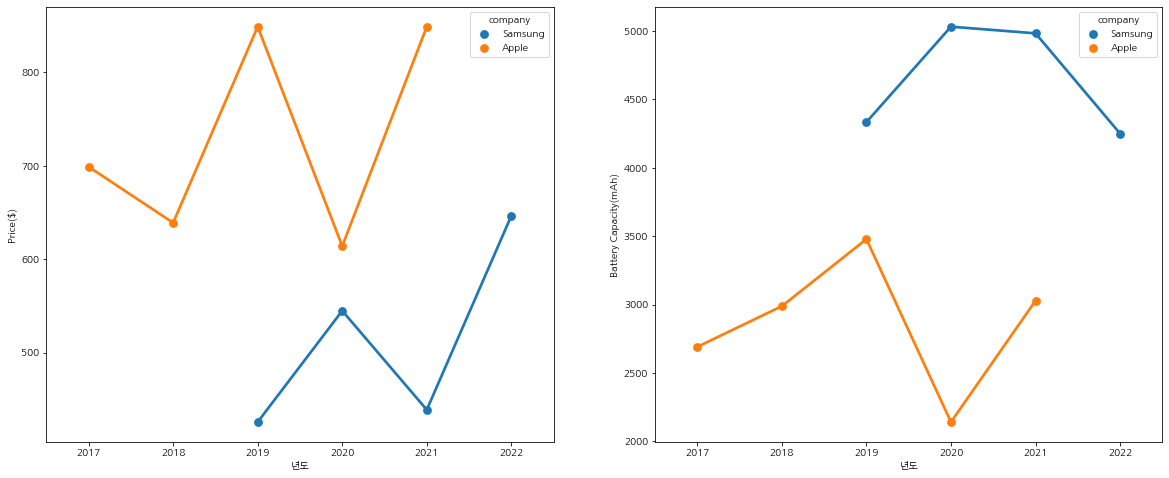

In [45]:
# 배터리 대비 용량 가격

fig, axes = plt.subplots(1,2,figsize = (20,8))


sns.pointplot(data = df13, x = '년도', y = 'Price($)', hue = 'company', ax = axes[0])
sns.pointplot(data = df13, x = '년도', y = 'Battery Capacity(mAh)', hue = 'company', ax = axes[1])

# 가격은 같이 상승과 감소를 한다.
# 배터리용량은 Apple가 적지만 가격은 Apple이 더 높다.
# Apple의 가격의 주된 기준은 배터리 용량이 아니다 ==> 다른 요소라고 생각 가능하다 (ex. 카메라, 외부 디자인, 브랜드 등)

In [46]:
pprice = df10.groupby('년도')
pprice = pprice.mean()

/tmp/ipykernel_3044/2707455518.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pprice = pprice.mean()


In [47]:
pprice = pprice.drop([2022, 2023], axis =0)
pprice

,Battery Capacity(mAh),Price($)
년도,,
2017,2691.000000,699.000000
2018,3622.100000,501.500000
2019,4167.353741,568.523810
2020,4369.074245,436.804943
2021,4572.124870,505.798102


In [48]:
kro_data = kr_data.iloc[-5:, :]
kro_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,
2017,119.6,21.4,131.63136,55.33248,3.2,75.5,44.4,36.8256,6.8544,32.5,15.412844,3594.935780,3026.605505,16.183486,5283.577982,1074.541284
2018,143.3,23.7,170.29824,60.11712,3.3,72.6,42.6,33.1968,6.9888,29.4,13.765766,3791.783784,3022.522523,13.826087,7581.630435,996.771739
2019,134.4,18.5,126.24192,63.20832,1.8,67.7,40.2,27.5520,6.3168,28.4,11.363636,3149.888889,2581.313131,12.852941,6948.529412,988.401961
2020,158.7,18.4,133.29792,67.58976,1.6,68.9,36.8,24.1920,4.4352,33.4,10.445652,3147.608696,3093.478261,10.000000,12210.487805,1023.536585
2021,200.5,19.9,172.00512,82.50816,2.9,76.3,33.3,28.7616,3.8976,37.7,10.925234,2297.757009,2784.112150,8.944444,14049.444444,1032.888889


In [49]:
kro_data.index = pprice.index
ph_price = pd.concat((kro_data, pprice), axis = 1)
ph_price

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU,Battery Capacity(mAh),Price($)
년도,,,,,,,,,,,,,,,,,,
2017,119.6,21.4,131.63136,55.33248,3.2,75.5,44.4,36.8256,6.8544,32.5,15.412844,3594.935780,3026.605505,16.183486,5283.577982,1074.541284,2691.000000,699.000000
2018,143.3,23.7,170.29824,60.11712,3.3,72.6,42.6,33.1968,6.9888,29.4,13.765766,3791.783784,3022.522523,13.826087,7581.630435,996.771739,3622.100000,501.500000
2019,134.4,18.5,126.24192,63.20832,1.8,67.7,40.2,27.5520,6.3168,28.4,11.363636,3149.888889,2581.313131,12.852941,6948.529412,988.401961,4167.353741,568.523810
2020,158.7,18.4,133.29792,67.58976,1.6,68.9,36.8,24.1920,4.4352,33.4,10.445652,3147.608696,3093.478261,10.000000,12210.487805,1023.536585,4369.074245,436.804943
2021,200.5,19.9,172.00512,82.50816,2.9,76.3,33.3,28.7616,3.8976,37.7,10.925234,2297.757009,2784.112150,8.944444,14049.444444,1032.888889,4572.124870,505.798102


In [50]:
def check_price_corr(df):
    list6 = []
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['Price(만)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) 스마트폰 가격의 상관도 : ", corr)
        list6.append(corr)
    return list6
        
        
def check_battery_corr(df):
    list7 = []
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['Battery Capacity(mAh)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) 배터리 용량의 상관도 : ", corr)
        list7.append(corr)
    return list7

In [51]:
ph_price['Price(만)'] = ph_price['Price($)'] * 1344 / 10000
ph_price.drop(['Price($)'], axis = 1, inplace = True)
ph_price

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU,Battery Capacity(mAh),Price(만)
년도,,,,,,,,,,,,,,,,,,
2017,119.6,21.4,131.63136,55.33248,3.2,75.5,44.4,36.8256,6.8544,32.5,15.412844,3594.935780,3026.605505,16.183486,5283.577982,1074.541284,2691.000000,93.945600
2018,143.3,23.7,170.29824,60.11712,3.3,72.6,42.6,33.1968,6.9888,29.4,13.765766,3791.783784,3022.522523,13.826087,7581.630435,996.771739,3622.100000,67.401600
2019,134.4,18.5,126.24192,63.20832,1.8,67.7,40.2,27.5520,6.3168,28.4,11.363636,3149.888889,2581.313131,12.852941,6948.529412,988.401961,4167.353741,76.409600
2020,158.7,18.4,133.29792,67.58976,1.6,68.9,36.8,24.1920,4.4352,33.4,10.445652,3147.608696,3093.478261,10.000000,12210.487805,1023.536585,4369.074245,58.706584
2021,200.5,19.9,172.00512,82.50816,2.9,76.3,33.3,28.7616,3.8976,37.7,10.925234,2297.757009,2784.112150,8.944444,14049.444444,1032.888889,4572.124870,67.979265


In [52]:
price_corr = check_price_corr(ph_price)
# 디스플레이 수출이 많은 해에는 스마트폰 가격이 높다.
# CPU및 GPU의 공정 단위가 낮아질수록 스마트폰의 가격은 높아진다.


반도체_생산(조원) 와(과) 스마트폰 가격의 상관도 :  -0.6238788259554445

반도체_시장점유율(퍼센트) 와(과) 스마트폰 가격의 상관도 :  0.22850236827741086

반도체_수출(조원) 와(과) 스마트폰 가격의 상관도 :  -0.37771615345192494

반도체_수입(조원) 와(과) 스마트폰 가격의 상관도 :  -0.5523424055135583

DRAM_가격(달러) 와(과) 스마트폰 가격의 상관도 :  0.4369165538097041

디스플레이_생산(조원) 와(과) 스마트폰 가격의 상관도 :  0.3813882947779566

디스플레이_시장점유율(퍼센트) 와(과) 스마트폰 가격의 상관도 :  0.660450659930013

디스플레이_수출(조원) 와(과) 스마트폰 가격의 상관도 :  0.7803418983660031

디스플레이_수입(조원) 와(과) 스마트폰 가격의 상관도 :  0.6041052928324695

LCD_평균가격(달러) 와(과) 스마트폰 가격의 상관도 :  -0.18222686824936907

Process Size(nm)_CPU 와(과) 스마트폰 가격의 상관도 :  0.7710188033104738

Transistors (million)_CPU 와(과) 스마트폰 가격의 상관도 :  0.3278412558604394

Freq (MHz)_CPU 와(과) 스마트폰 가격의 상관도 :  -0.11411638936925363

Process Size(nm)_GPU 와(과) 스마트폰 가격의 상관도 :  0.7973942281122853

Transistors (million)_GPU 와(과) 스마트폰 가격의 상관도 :  -0.7443534250588524

Freq (MHz)_GPU 와(과) 스마트폰 가격의 상관도 :  0.578765372208195

Battery Capacity(mAh) 와(과) 스마트폰 가격의 상관도 :  -0.8179778962278126

Price(만) 와(과) 스마트폰

In [53]:
bat_corr = check_battery_corr(ph_price)

# 배터리 용량은 CPU, GPU공정 단위에 아주 큰 상관도를 보인다.
# 또한 디스플레이 수출이 적은해에 배터리 용량은 커진다.
# GPU의 Transistor 갯수가 많아질수록, CPU의 Transistor 갯수가 적어질수록 배터리 용량은 커진다. 


반도체_생산(조원) 와(과) 배터리 용량의 상관도 :  0.7764361535483073

반도체_시장점유율(퍼센트) 와(과) 배터리 용량의 상관도 :  -0.5825565043448652

반도체_수출(조원) 와(과) 배터리 용량의 상관도 :  0.24899636687996515

반도체_수입(조원) 와(과) 배터리 용량의 상관도 :  0.8167714612710627

DRAM_가격(달러) 와(과) 배터리 용량의 상관도 :  -0.5798199313887066

디스플레이_생산(조원) 와(과) 배터리 용량의 상관도 :  -0.35309892691321704

디스플레이_시장점유율(퍼센트) 와(과) 배터리 용량의 상관도 :  -0.8918863106072117

디스플레이_수출(조원) 와(과) 배터리 용량의 상관도 :  -0.8924280223007137

디스플레이_수입(조원) 와(과) 배터리 용량의 상관도 :  -0.7836524082993032

LCD_평균가격(달러) 와(과) 배터리 용량의 상관도 :  0.33017579902999333

Process Size(nm)_CPU 와(과) 배터리 용량의 상관도 :  -0.9686722511486935

Transistors (million)_CPU 와(과) 배터리 용량의 상관도 :  -0.7399689151134385

Freq (MHz)_CPU 와(과) 배터리 용량의 상관도 :  -0.40089241633576694

Process Size(nm)_GPU 와(과) 배터리 용량의 상관도 :  -0.9391869292088658

Transistors (million)_GPU 와(과) 배터리 용량의 상관도 :  0.8218313476402914

Freq (MHz)_GPU 와(과) 배터리 용량의 상관도 :  -0.5575898171262602

Battery Capacity(mAh) 와(과) 배터리 용량의 상관도 :  0.9999999999999999

Price(만) 와(과) 배터리 용량의 상관도 :  

In [54]:
pr_corr = pd.DataFrame(price_corr)
batt_corr = pd.DataFrame(bat_corr)

list8 = ['반도체_생산(조원)', '반도체_시장점유율(퍼센트)', '반도체_수출(조원)', '반도체_수입(조원)', 'DRAM_가격(달러)', '디스플레이_생산(조원)', '디스플레이_시장점유율(퍼센트)', '디스플레이_수출(조원)', '디스플레이_수입(조원)', 'LCD_평균가격(달러)', 'Process Size(nm)_CPU', 'Transistors (million)_CPU', 'Freq (MHz)_CPU', 'Process Size(nm)_GPU', 'Transistors (million)_GPU', 'Freq (MHz)_GPU', 'Battery Capacity(mAh)', 'Price(만)']
df_list9 = pd.DataFrame(list8)
df_cor = pd.concat((pr_corr, batt_corr, df_list9), axis = 1)


In [55]:
df_cor.columns = ['스마트폰 가격과 상관도', '배터리 용량과 상관도', 'index']

df_cor = df_cor.drop([4, 16, 17], axis = 0)
df_cor

,스마트폰 가격과 상관도,배터리 용량과 상관도,index
0,-0.623879,0.776436,반도체_생산(조원)
1,0.228502,-0.582557,반도체_시장점유율(퍼센트)
2,-0.377716,0.248996,반도체_수출(조원)
3,-0.552342,0.816771,반도체_수입(조원)
5,0.381388,-0.353099,디스플레이_생산(조원)
6,0.660451,-0.891886,디스플레이_시장점유율(퍼센트)
7,0.780342,-0.892428,디스플레이_수출(조원)
8,0.604105,-0.783652,디스플레이_수입(조원)
9,-0.182227,0.330176,LCD_평균가격(달러)
10,0.771019,-0.968672,Process Size(nm)_CPU


In [56]:
df_cor = df_cor.set_index('index')

df_cor['스마트폰 가격과 상관도'] = abs(df_cor['스마트폰 가격과 상관도'])
df_cor['배터리 용량과 상관도'] = abs(df_cor['배터리 용량과 상관도'])
df_cor

,스마트폰 가격과 상관도,배터리 용량과 상관도
index,,
반도체_생산(조원),0.623879,0.776436
반도체_시장점유율(퍼센트),0.228502,0.582557
반도체_수출(조원),0.377716,0.248996
반도체_수입(조원),0.552342,0.816771
디스플레이_생산(조원),0.381388,0.353099
디스플레이_시장점유율(퍼센트),0.660451,0.891886
디스플레이_수출(조원),0.780342,0.892428
디스플레이_수입(조원),0.604105,0.783652
LCD_평균가격(달러),0.182227,0.330176


Text(0.5, 1.0, '배터리 용량과 상관도')

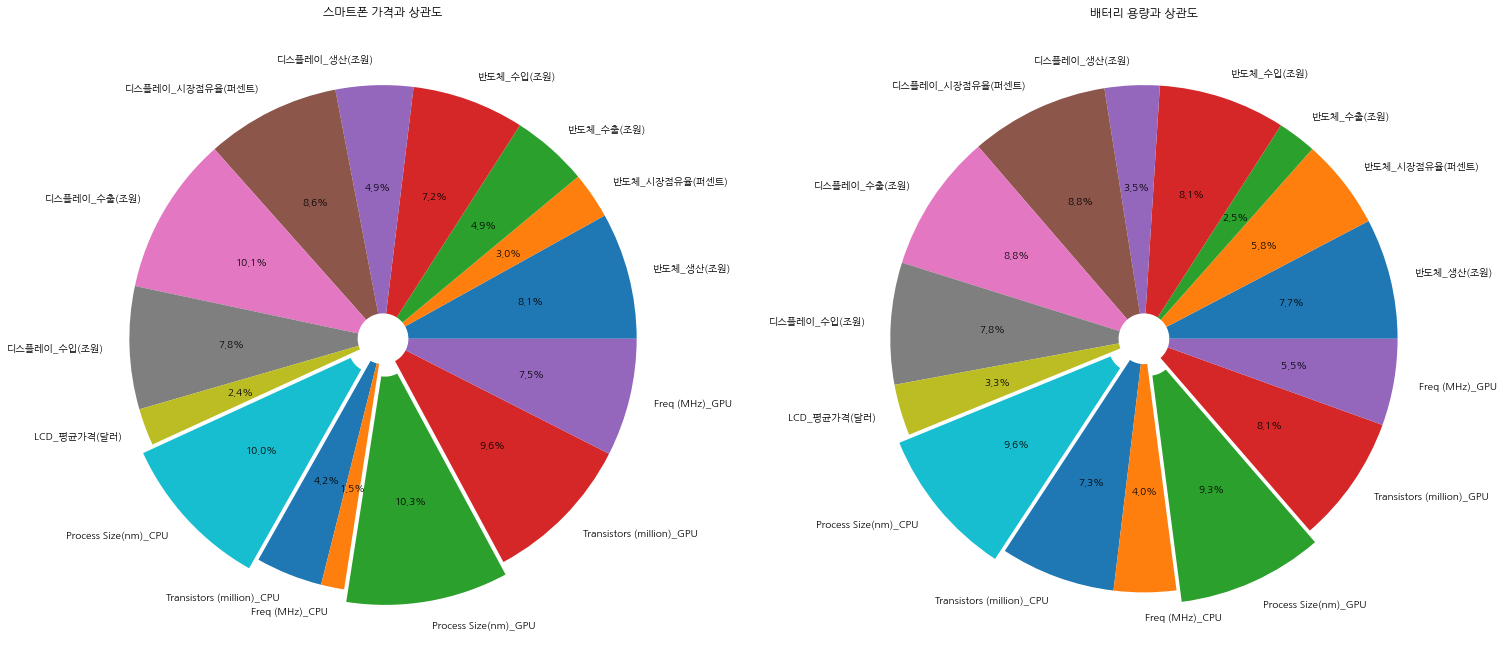

In [57]:
xs = df_cor['스마트폰 가격과 상관도']
ys = df_cor['배터리 용량과 상관도']

fig, axe = plt.subplots(1,2, figsize = (25, 12))



#explode를 위한 list
ex_array = np.zeros(len(xs.index))
ex_array[-6] = 0.05
ex_array[-3] = 0.05

e_array = np.zeros(len(ys.index))
e_array[-6] = 0.05
e_array[-3] = 0.05


# pie차트
axe[0].pie(xs, labels = xs.index, 
           autopct='%1.1f%%',
           explode = ex_array,
           wedgeprops = dict(width=0.9)
          )
axe[1].pie(ys, labels = ys.index, 
           autopct='%1.1f%%',
           explode = e_array,
           wedgeprops = dict(width=0.9)
          )
axe[0].set_title('스마트폰 가격과 상관도')
axe[1].set_title('배터리 용량과 상관도')


# 배터리 용량과 스마트폰 가격은 CPU, GPU의 공정단위에 가장 큰 상관도를 보인다.

In [58]:
# CPU 공정단위에 따른 스마트폰 가격 예측

ph_price = ph_price.reset_index()
ph_price

xs = ph_price['Process Size(nm)_CPU']
ys = ph_price['Price(만)']

xs_mean = xs.mean()
ys_mean = ys.mean()
xs_std = xs.std()
ys_std = ys.std()

print('mean(xs, ys) : ', xs_mean,'\t', ys_mean)
print('std(xs, ys) : ', xs_std, '\t', ys_std)
xy_corr = np.corrcoef(xs, ys)[0,1]
print('corrcoef : ', xy_corr)

# 기울기
slope = xy_corr * (ys_std / xs_std)
# y값
intercept = ys_mean - (slope * xs_mean)
print('intercept : ', intercept)

ys_pred = xs*slope+intercept

mean(xs, ys) :  12.382626396974448 	 72.8885298394914
std(xs, ys) :  2.1218798811637885 	 13.333538529879267
corrcoef :  0.7710188033104739
intercept :  12.895283280433972


In [59]:
# GPU 공정단위에 따른 스마트폰 가격 예측

ph_price = ph_price.reset_index()
ph_price

xs_g = ph_price['Process Size(nm)_GPU']
ys_g = ph_price['Price(만)']

xs_mean = xs.mean()
ys_mean = ys.mean()
xs_std = xs.std()
ys_std = ys.std()

print('mean(xs, ys) : ', xs_mean,'\t', ys_mean)
print('std(xs, ys) : ', xs_std, '\t', ys_std)
xy_corr = np.corrcoef(xs, ys)[0,1]
print('corrcoef : ', xy_corr)

# 기울기
slope = xy_corr * (ys_std / xs_std)
# y값
intercept = ys_mean - (slope * xs_mean)
print('intercept : ', intercept)

ysg_pred = xs*slope+intercept

mean(xs, ys) :  12.382626396974448 	 72.8885298394914
std(xs, ys) :  2.1218798811637885 	 13.333538529879267
corrcoef :  0.7710188033104739
intercept :  12.895283280433972


Text(0.5, 1.0, 'GPU 나노공정에 따른 스마트폰 가격예측')

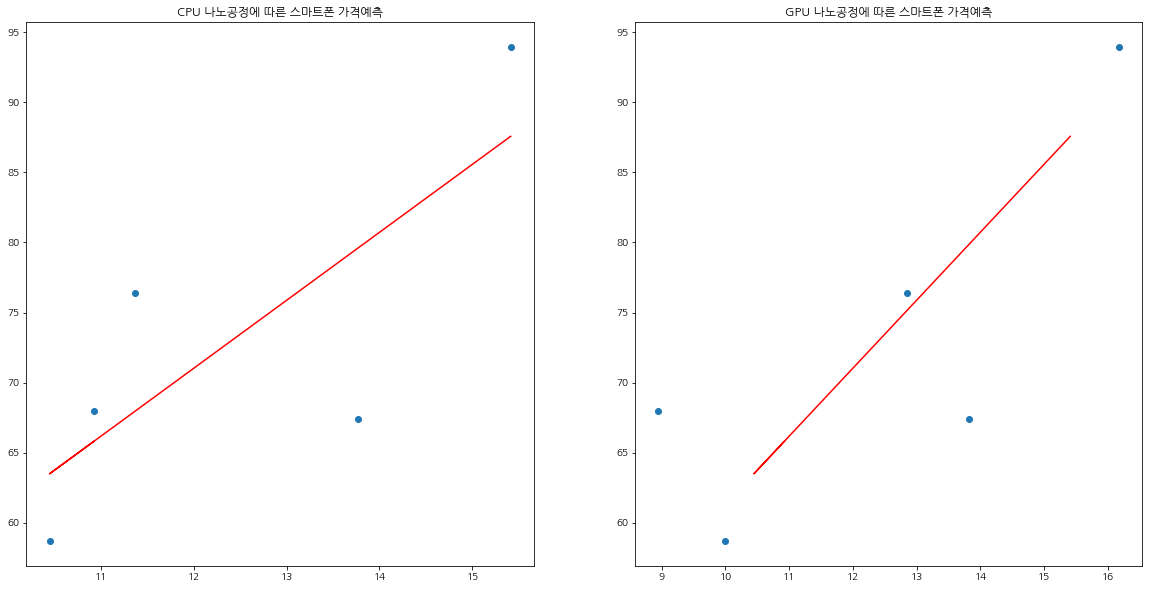

In [60]:
fig, axe = plt.subplots(1,2, figsize = (20,10))
axe[0].scatter(xs , ys)
axe[0].plot(xs, ys_pred, c = 'r')
axe[0].set_title('CPU 나노공정에 따른 스마트폰 가격예측')

axe[1].scatter(xs_g , ys_g)
axe[1].plot(xs, ysg_pred, c = 'r')
axe[1].set_title('GPU 나노공정에 따른 스마트폰 가격예측')

결과보고서
========
### 주제 : CPU, GPU 발전에 따른 대한민국 주요시장 분석

#### 주제선정 배경 
1. 최근 대한민국의 반도체 경기가 많이 안좋다라는 소식을 종종 접한다. 뿐만 아니라, 

   ***시스템 반도체가 유망해지면서***
   
   한국의 반도체 업체들은 이제 메모리 반도체보다는 시스템반도체 시장을 잡기위해 노력중이라는 기사를 종종 볼 수 있다.
   
   (한국의 반도체 기업들은 메모리 반도체 시장으로 유명하였다. (DRAM, ROM, etc))
   
       즉, 몇십년동안 짜장전문점이 짬뽕에 투자하기 시작한것이다.

> 왜 안좋은가? 
>
> (2017년도부터 전기차를 위해 많은 수요를 예상하여 공장을 늘렸지만, 코로나, 전쟁, 경쟁업체의 성장으로 인해 수요는 줄어들었고, 공급은 공장을 늘렸기 때문에 과공급이 되고있기 때문이다.)

>> ***대표적인 파운드리 공정 제품인 CPU, GPU의 발전은 우리나라의 주력 시장과 얼마나 상관성을 보이는지 알아보기 위해
>> 이러한 주제를 선정하게 되었습니다.***


> ***파운드리란?***
>
> 우리나라를 예를 들어 반도체 사업부를 설명하자면 두가지가 있다.
>
> 메모리 사업부 : 이미 정해진 스펙대로 계속 제작, 생산된다.
>
> 파운드리 사업부 : 메모리와는 조금 다른 의미로 회사의 필요 요구 스펙에 맞춰 제작,생산되는 반도체이다.
>
> 즉, 시스템 반도체는 파운드리 사업부의 영역이다.


#### 데이터 
* 1st file(https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data)은

  전세계 주요 CPU와 GPU의 공정 단위, Transistor의 갯수, 주파수가 년도별로 정리되어있는 파일이다.

> ***공정단위란?***

* 2nd file(https://www.data.go.kr/data/15051125/fileData.do)

  한국의 반도체, 디스플레이 등 주요 시장의 데이터들이 정리되어있는 파일이다.
  
* 3rd file(https://www.kaggle.com/datasets/rkiattisak/mobile-phone-price)

  ***추가분석을 위한 파일로*** 스마트폰의 모델 정보와 가격(소매가 기준)이 데이터로 정리되어있는 파일이다.
  
  1st, 2nd와 3rd를 연도를 기준으로 하나의 데이터프레임으로 만들기 위해 selenium을 이용하여 연도 데이터를 가져와서 정리하였다. 
  
  selenium 사이트 (https://www.gsmarena.com)
  
#### 분석 목표

1. 무어의 법칙은 현시대에서 이미 깨졌다?

> ***무어의 법칙이란?***
>
> ***CPU, GPU에서의 Transistor의 역할은?***

2. CPU, GPU간의 상관도 비교 후 결과 도출

3. 반도체 및 디스플레이 시장 점유율 and 생산량대비수출량 년도별 분석
> **생산보다 수출이 많을수록 그 시장이 좋은걸 뜻한다.**

4. CPU, GPU와 대한민국 산업체의 상관도 분석 가장 상관성이 큰 것은?

***추가분석***
> 스마트폰 가격을 예측하기 위해 스마트폰 가격 데이터를 가져왔다.
>> **그러나 2017년 ~ 2023년까지의 데이터 이기 때문에 앞선 데이터와 합치기 위해 2017 ~ 2021년도 까지만 데이터를 사용하였다.**
>
> 애플과 삼성을 기준으로 년도별 배터리 용량, 스마트폰 가격을 분석 (스마트폰가격과 배터리 용량은 음의 상관도를 보인다.)
>> **이 또한 결측 연도가 많아서 정확한 분석은 힘들었다.**
>
> 스마트폰의 가격과 가장 상관도를 분석해 보았다.
>> 국내시장에선 디스플레이 수출이, CPU,GPU 공정단위와 GPU의 Transistor의 갯수와 높은 상관도를 보였다.